In [1]:
import os
os.chdir('..')

In [2]:
from src.data_exploration.data_exploration import *
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = read_sqlite_table('housedata', './data/processed/rome_house_cleaned.db')

In [5]:
df.head()

,latitude,longitude,price,buildingYear,surface,rooms,bathrooms,floor,floors,garage,...,Palazzo - Edificio,Villetta a schiera,Rustico - Casale,Casa indipendente,Loft,balcone,terrazza,cantina,piscina,giardino
0,41.845798,12.545600,96000.0,1955,114,3,1,-1.0,3,0,...,0,0,0,0,0,0,1,1,0,0
1,41.845501,12.489500,500000.0,1971,122,4,2,4.0,6,1,...,0,0,0,0,0,1,1,1,0,1
2,41.843842,12.489600,430000.0,1971,110,3,2,1.0,4,1,...,0,0,0,0,0,1,1,0,0,0
3,41.848701,12.487170,359000.0,1960,118,3,1,5.0,8,0,...,0,0,0,0,0,1,0,0,0,1
4,41.841084,12.498786,625000.0,2021,126,4,2,5.5,6,1,...,0,0,0,0,0,1,1,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15339 entries, 0 to 15338
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            15339 non-null  float64
 1   longitude           15339 non-null  float64
 2   price               15339 non-null  float64
 3   buildingYear        15339 non-null  int64  
 4   surface             15339 non-null  int64  
 5   rooms               15339 non-null  int64  
 6   bathrooms           15339 non-null  int64  
 7   floor               15339 non-null  float64
 8   floors              15339 non-null  int64  
 9   garage              15339 non-null  int64  
 10  luxury              15339 non-null  int64  
 11  Appartamento        15339 non-null  int64  
 12  Attico - Mansarda   15339 non-null  int64  
 13  Villa               15339 non-null  int64  
 14  Palazzo - Edificio  15339 non-null  int64  
 15  Villetta a schiera  15339 non-null  int64  
 16  Rust

In [7]:
df.columns

Index(['latitude', 'longitude', 'price', 'buildingYear', 'surface', 'rooms',
       'bathrooms', 'floor', 'floors', 'garage', 'luxury', 'Appartamento',
       'Attico - Mansarda', 'Villa', 'Palazzo - Edificio',
       'Villetta a schiera', 'Rustico - Casale', 'Casa indipendente', 'Loft',
       'balcone', 'terrazza', 'cantina', 'piscina', 'giardino'],
      dtype='object')

In [10]:
df[['latitude', 'longitude', 'price', 'buildingYear', 'surface', 'rooms',
       'bathrooms', 'floor', 'floors', 'garage', 'luxury','Appartamento']].describe()

,latitude,longitude,price,buildingYear,surface,rooms,bathrooms,floor,floors,garage,luxury,Appartamento
count,15339.000000,15339.000000,1.533900e+04,15339.000000,15339.000000,15339.000000,15339.000000,15339.000000,15339.000000,15339.000000,15339.000000,15339.000000
mean,41.895810,12.492006,5.434285e+05,1958.667449,140.729122,3.223874,1.583741,2.355597,3.311754,0.444749,0.115523,0.893605
std,0.040493,0.055258,4.449339e+06,65.775911,1963.082594,1.113556,0.690131,2.033695,12.903216,1.059635,0.319662,0.308353
min,41.793400,12.373935,7.000000e+02,1000.000000,1.000000,1.000000,1.000000,-1.000000,-99.000000,0.000000,0.000000,0.000000
25%,41.867146,12.446500,2.250000e+05,1957.000000,70.000000,2.000000,1.000000,1.000000,4.000000,0.000000,0.000000,1.000000
50%,41.896198,12.488950,3.180000e+05,1965.000000,94.000000,3.000000,1.000000,2.000000,5.000000,0.000000,0.000000,1.000000
75%,41.927898,12.537800,4.890000e+05,1979.000000,130.000000,4.000000,2.000000,3.500000,6.000000,1.000000,0.000000,1.000000
max,41.989700,12.614900,5.200000e+08,2026.000000,240700.000000,5.000000,3.000000,26.000000,75.000000,70.000000,1.000000,1.000000


In [9]:
df[['Attico - Mansarda', 'Villa', 'Palazzo - Edificio',
       'Villetta a schiera', 'Rustico - Casale', 'Casa indipendente', 'Loft',
       'balcone', 'terrazza', 'cantina', 'piscina', 'giardino']].describe()

,Attico - Mansarda,Villa,Palazzo - Edificio,Villetta a schiera,Rustico - Casale,Casa indipendente,Loft,balcone,terrazza,cantina,piscina,giardino
count,15339.000000,15339.000000,15339.000000,15339.000000,15339.000000,15339.000000,15339.000000,15339.000000,15339.000000,15339.000000,15339.000000,15339.000000
mean,0.061542,0.021579,0.009062,0.006585,0.000848,0.003586,0.003194,0.621553,0.339983,0.300476,0.024578,0.320295
std,0.240331,0.145309,0.094765,0.080880,0.029101,0.059775,0.056431,0.485016,0.473718,0.458480,0.154840,0.466605
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Si notano valori floors di -99 assegnati durante il data pre processing per i valori missing, si procede a contarli ed eliminarli

In [11]:
df[df['floors']==-99].shape

(234, 24)

In [12]:
df1 = df.copy()
df1 = df1[df['floors']!=-99]
df1.shape

(15105, 24)

In [13]:
df1[['latitude', 'longitude', 'price', 'buildingYear', 'surface', 'rooms',
       'bathrooms', 'floor', 'floors', 'garage', 'luxury','Appartamento']].describe()

,latitude,longitude,price,buildingYear,surface,rooms,bathrooms,floor,floors,garage,luxury,Appartamento
count,15105.000000,15105.000000,1.510500e+04,15105.000000,15105.000000,15105.000000,15105.000000,15105.000000,15105.000000,15105.000000,15105.000000,15105.000000
mean,41.895889,12.491988,5.447568e+05,1958.592122,141.217875,3.223899,1.585435,2.360179,4.896723,0.446342,0.116518,0.893413
std,0.040456,0.055284,4.482214e+06,66.135591,1978.198395,1.113072,0.691293,2.036092,2.094859,1.065728,0.320855,0.308598
min,41.793400,12.373935,7.000000e+02,1000.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000
25%,41.867401,12.446500,2.250000e+05,1957.000000,70.000000,2.000000,1.000000,1.000000,4.000000,0.000000,0.000000,1.000000
50%,41.896301,12.488950,3.190000e+05,1965.000000,94.000000,3.000000,1.000000,2.000000,5.000000,0.000000,0.000000,1.000000
75%,41.927898,12.537800,4.890000e+05,1979.000000,130.000000,4.000000,2.000000,3.500000,6.000000,1.000000,0.000000,1.000000
max,41.989700,12.614900,5.200000e+08,2026.000000,240700.000000,5.000000,3.000000,26.000000,75.000000,70.000000,1.000000,1.000000


In [14]:
df1[['Attico - Mansarda', 'Villa', 'Palazzo - Edificio',
       'Villetta a schiera', 'Rustico - Casale', 'Casa indipendente', 'Loft',
       'balcone', 'terrazza', 'cantina', 'piscina', 'giardino']].describe()

,Attico - Mansarda,Villa,Palazzo - Edificio,Villetta a schiera,Rustico - Casale,Casa indipendente,Loft,balcone,terrazza,cantina,piscina,giardino
count,15105.000000,15105.000000,15105.000000,15105.000000,15105.000000,15105.000000,15105.000000,15105.000000,15105.000000,15105.000000,15105.000000,15105.000000
mean,0.062032,0.021913,0.008275,0.006687,0.000861,0.003641,0.003178,0.622046,0.341807,0.300563,0.024760,0.320887
std,0.241222,0.146405,0.090595,0.081500,0.029325,0.060234,0.056284,0.484892,0.474331,0.458518,0.155398,0.466833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Si analizzano i duplicati e si rimuovono

In [15]:
df1.duplicated().sum()

643

In [16]:
df2 = df1.drop_duplicates(keep='first', inplace=False, ignore_index=True)
df2.shape

(14462, 24)

In [18]:
df2[['latitude', 'longitude', 'price', 'buildingYear', 'surface', 'rooms',
       'bathrooms', 'floor', 'floors', 'garage', 'luxury','Appartamento']].describe()

,latitude,longitude,price,buildingYear,surface,rooms,bathrooms,floor,floors,garage,luxury,Appartamento
count,14462.000000,14462.000000,1.446200e+04,14462.000000,14462.000000,14462.000000,14462.000000,14462.000000,14462.000000,14462.000000,14462.000000,14462.000000
mean,41.895457,12.491494,5.530835e+05,1957.369105,143.408104,3.239455,1.591550,2.364922,4.906721,0.451252,0.118863,0.890679
std,0.040416,0.054723,4.580031e+06,66.723045,2021.629332,1.114550,0.693868,2.043057,2.110088,1.081530,0.323639,0.312052
min,41.793400,12.373935,7.000000e+02,1000.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000
25%,41.867199,12.446400,2.250000e+05,1956.000000,70.000000,2.000000,1.000000,1.000000,4.000000,0.000000,0.000000,1.000000
50%,41.895699,12.488500,3.190000e+05,1965.000000,95.000000,3.000000,1.000000,2.000000,5.000000,0.000000,0.000000,1.000000
75%,41.927299,12.536600,4.900000e+05,1975.000000,130.000000,4.000000,2.000000,3.500000,6.000000,1.000000,0.000000,1.000000
max,41.989700,12.614900,5.200000e+08,2026.000000,240700.000000,5.000000,3.000000,26.000000,75.000000,70.000000,1.000000,1.000000


In [19]:
df2[['Attico - Mansarda', 'Villa', 'Palazzo - Edificio',
       'Villetta a schiera', 'Rustico - Casale', 'Casa indipendente', 'Loft',
       'balcone', 'terrazza', 'cantina', 'piscina', 'giardino']].describe()

,Attico - Mansarda,Villa,Palazzo - Edificio,Villetta a schiera,Rustico - Casale,Casa indipendente,Loft,balcone,terrazza,cantina,piscina,giardino
count,14462.000000,14462.000000,14462.000000,14462.000000,14462.000000,14462.000000,14462.000000,14462.000000,14462.000000,14462.000000,14462.000000,14462.000000
mean,0.063546,0.022542,0.008505,0.006707,0.000899,0.003803,0.003319,0.617549,0.344212,0.304246,0.025446,0.325889
std,0.243951,0.148443,0.091833,0.081625,0.029969,0.061554,0.057517,0.486003,0.475127,0.460103,0.157481,0.468722
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='buildingYear', ylabel='Count'>

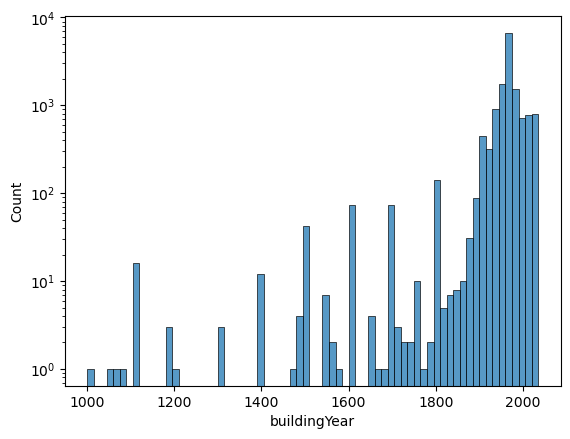

In [20]:
sns.histplot(x=df2['buildingYear'],binwidth=15, discrete=False, log_scale=[False,True])

<Axes: xlabel='surface', ylabel='Count'>

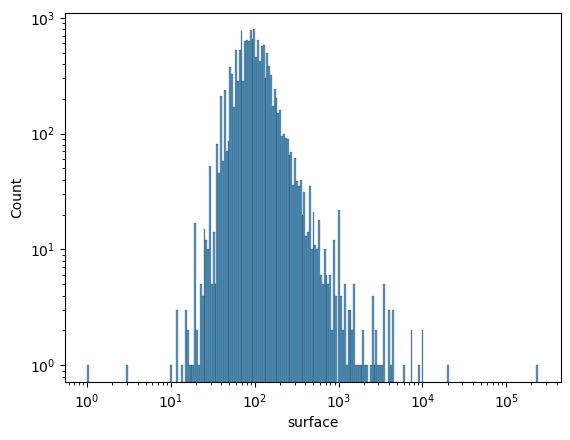

In [21]:
sns.histplot(x=df2['surface'],discrete=False, log_scale=[True,True])

<Axes: xlabel='rooms', ylabel='Count'>

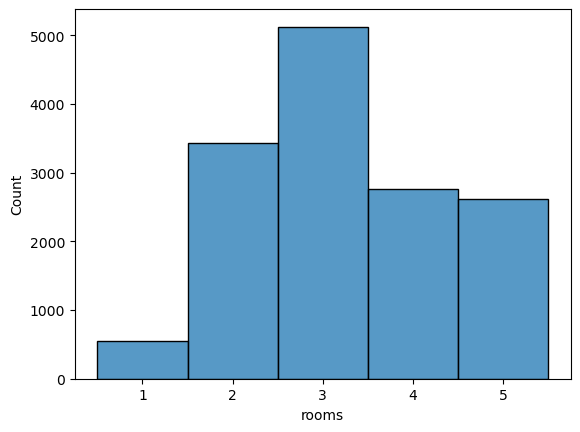

In [22]:
sns.histplot(x=df2['rooms'], discrete=True)

<Axes: xlabel='bathrooms', ylabel='Count'>

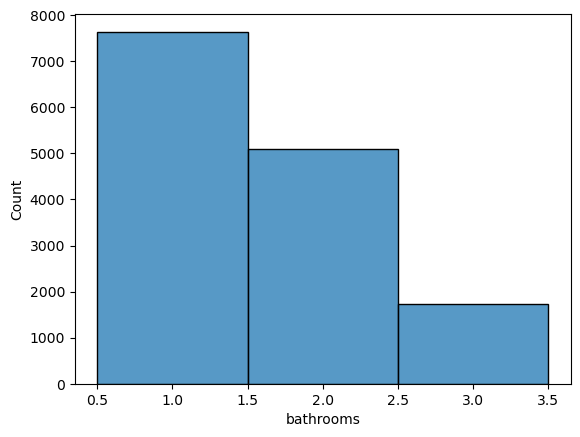

In [23]:
sns.histplot(x=df2['bathrooms'], discrete=True)

<Axes: xlabel='floor', ylabel='Count'>

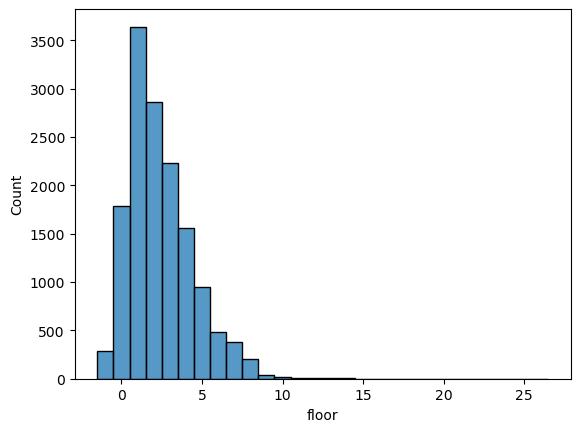

In [24]:
sns.histplot(x=df2['floor'], discrete=True)

<Axes: xlabel='floors', ylabel='Count'>

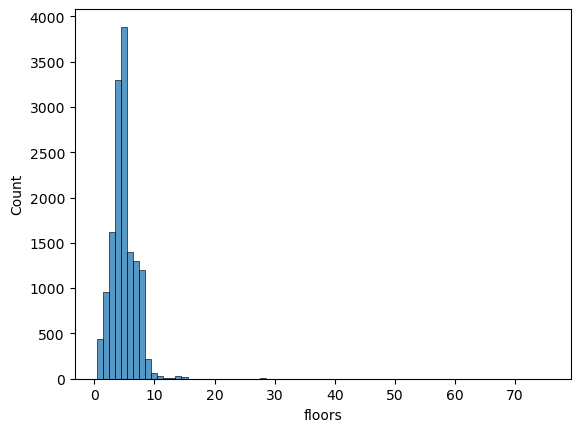

In [25]:
sns.histplot(x=df2['floors'], discrete=True)

<Axes: xlabel='giardino', ylabel='Count'>

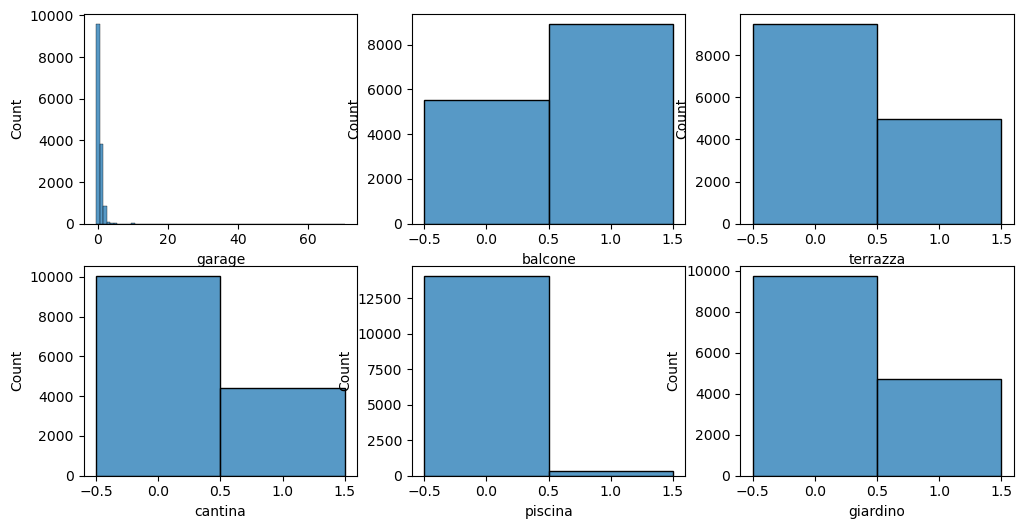

In [26]:
fig, axes = plt.subplots(2, 3,figsize=(12, 6))
sns.histplot(x=df2['garage'], discrete=True, ax=axes[0,0])
sns.histplot(x=df2['balcone'], discrete=True,ax=axes[0,1])
sns.histplot(x=df2['terrazza'], discrete=True,ax=axes[0,2])
sns.histplot(x=df2['cantina'], discrete=True, ax=axes[1,0])
sns.histplot(x=df2['piscina'], discrete=True,ax=axes[1,1])
sns.histplot(x=df2['giardino'], discrete=True,ax=axes[1,2])

<Axes: xlabel='Loft', ylabel='Count'>

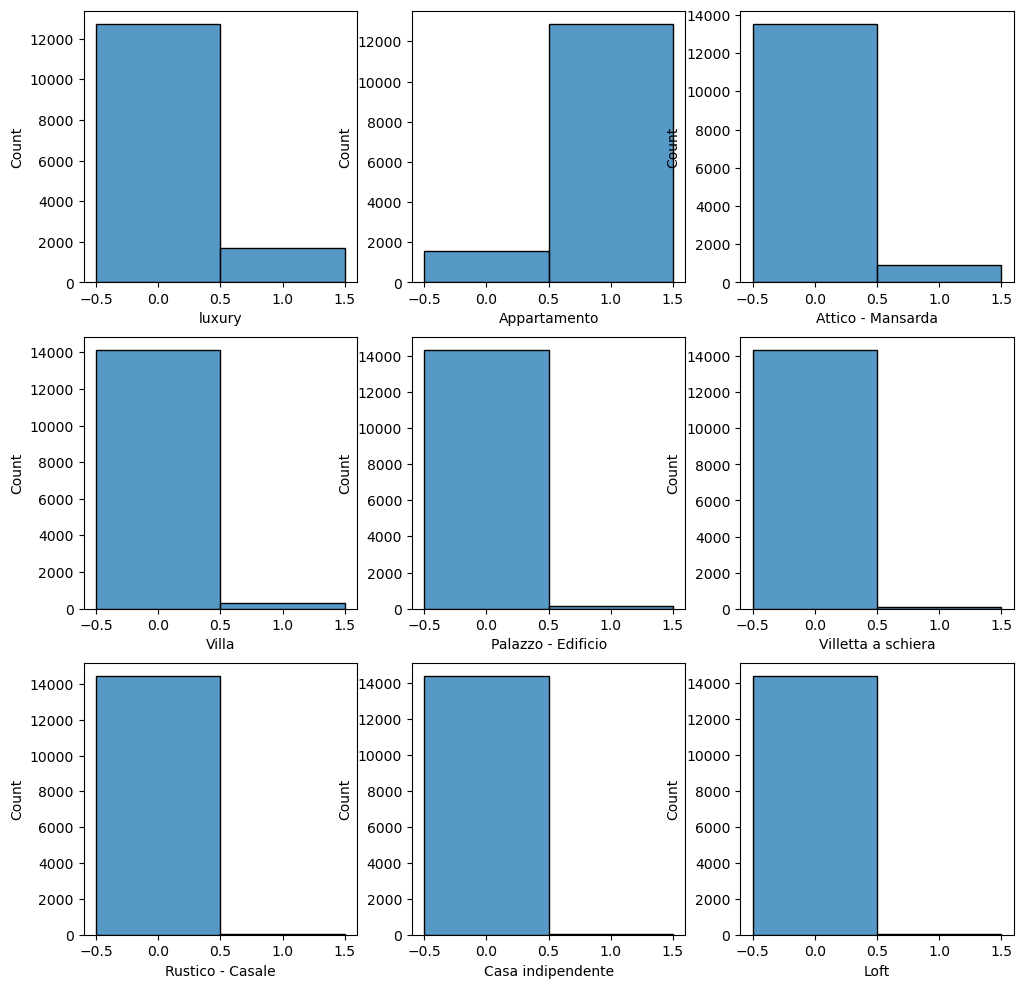

In [29]:
fig, axes = plt.subplots(3, 3,figsize=(12, 12))
sns.histplot(x=df2['luxury'], discrete=True, ax=axes[0,0])
sns.histplot(x=df2['Appartamento'], discrete=True,ax=axes[0,1])
sns.histplot(x=df2['Attico - Mansarda'], discrete=True,ax=axes[0,2])
sns.histplot(x=df2['Villa'], discrete=True, ax=axes[1,0])
sns.histplot(x=df2['Palazzo - Edificio'], discrete=True,ax=axes[1,1])
sns.histplot(x=df2['Villetta a schiera'], discrete=True,ax=axes[1,2]) 
sns.histplot(x=df2[ 'Rustico - Casale'], discrete=True, ax=axes[2,0])
sns.histplot(x=df2[ 'Casa indipendente'], discrete=True,ax=axes[2,1])
sns.histplot(x=df2['Loft'], discrete=True,ax=axes[2,2]) 

In [27]:
df2.isnull().sum()

latitude              0
longitude             0
price                 0
buildingYear          0
surface               0
rooms                 0
bathrooms             0
floor                 0
floors                0
garage                0
luxury                0
Appartamento          0
Attico - Mansarda     0
Villa                 0
Palazzo - Edificio    0
Villetta a schiera    0
Rustico - Casale      0
Casa indipendente     0
Loft                  0
balcone               0
terrazza              0
cantina               0
piscina               0
giardino              0
dtype: int64

In [34]:
df2.nlargest(250, 'surface', keep='first')

,latitude,longitude,price,buildingYear,surface,rooms,bathrooms,floor,floors,garage,...,Palazzo - Edificio,Villetta a schiera,Rustico - Casale,Casa indipendente,Loft,balcone,terrazza,cantina,piscina,giardino
13976,41.923100,12.47120,990000.0,1928,240700,5,3,1.0,2,20,...,0,0,1,0,0,1,1,1,0,1
10505,41.923599,12.54410,27000000.0,1990,20000,5,3,0.0,1,5,...,1,0,0,0,0,1,0,0,0,0
12106,41.906898,12.48790,105000000.0,1900,10000,5,3,0.0,6,15,...,1,0,0,0,0,1,0,0,0,0
12172,41.906200,12.49000,89000000.0,1900,10000,5,3,0.0,1,9,...,1,0,0,0,0,1,0,0,0,0
7939,41.888561,12.44534,36000000.0,1980,9000,5,3,3.0,6,10,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6748,41.834099,12.54130,3500000.0,1500,445,5,3,1.0,2,0,...,0,0,0,0,0,0,0,0,1,1
12109,41.909000,12.47710,5000000.0,1500,444,5,3,2.0,4,0,...,0,0,0,0,0,0,0,1,0,0
8921,41.938999,12.44330,1200000.0,1970,443,5,3,1.0,2,2,...,0,0,0,0,0,0,1,0,1,1
8485,41.898499,12.43990,3395000.0,2019,441,5,3,5.5,6,0,...,0,0,0,0,0,1,1,0,0,1


In [35]:
df2.nsmallest(10, 'surface', keep='first')

,latitude,longitude,price,buildingYear,surface,rooms,bathrooms,floor,floors,garage,...,Palazzo - Edificio,Villetta a schiera,Rustico - Casale,Casa indipendente,Loft,balcone,terrazza,cantina,piscina,giardino
6342,41.879398,12.5674,120000.0,1950,1,1,1,2.0,4,0,...,0,0,0,0,0,1,0,0,0,1
3534,41.946999,12.3886,125000.0,1966,3,2,1,2.0,3,0,...,0,0,0,0,0,0,1,0,0,0
9970,41.915699,12.5095,110000.0,1930,10,1,1,0.0,6,0,...,0,0,0,0,1,0,0,0,0,0
3964,41.967400,12.4341,32000.0,1975,12,1,1,-1.0,4,0,...,0,0,0,0,0,0,0,0,0,1
11857,41.903900,12.4843,210000.0,1800,12,1,1,6.0,6,0,...,0,0,0,0,0,0,0,0,0,0
13013,41.965401,12.4568,35000.0,1960,12,1,1,-1.0,4,0,...,0,0,0,0,0,0,0,0,0,0
3977,41.968201,12.4357,59000.0,1973,14,1,1,0.5,4,0,...,0,0,0,0,0,0,0,0,0,0
8795,41.943401,12.4398,59000.0,1970,15,1,1,0.0,4,0,...,0,0,0,0,0,0,0,0,0,0
8867,41.948700,12.4452,66000.0,1977,15,1,1,0.0,5,0,...,0,0,0,0,0,0,0,0,0,1
10972,41.894699,12.5154,103000.0,1950,15,1,1,0.0,4,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df_raw = read_sqlite_table('housedata', './data/processed/rome_house_raw.db')
df_raw.dtypes

macrozoneId      object
idHouse          object
latitude        float64
longitude       float64
price            object
buildingYear      int64
surface          object
rooms            object
bathrooms        object
floor           float64
floors            int64
garage            int64
isNew            object
luxury           object
typology         object
category         object
features         object
dtype: object

In [37]:
def trova_casa(df, df_raw, max_n, col):
    df = df.nlargest(max_n, col, keep='first')
    df = df.tail(1)['latitude']
    casa = df_raw[np.isclose(df_raw['latitude'], df,rtol=1e-06)]
    return casa

In [42]:
trova_casa(df2, df_raw, 203, 'surface')

,macrozoneId,idHouse,latitude,longitude,price,buildingYear,surface,rooms,bathrooms,floor,floors,garage,isNew,luxury,typology,category,features
2323,10172,99032104,41.891800,12.38400,239000,1975,125 m²,4,1,1.0,2,0,False,False,Appartamento,Residenziale,"Caminetto, Esposizione esterna, balcone, terra..."
2489,10172,83182989,41.891800,12.41160,95000,1970,50 m²,2,1,0.0,5,0,False,False,Appartamento,Residenziale,"Esposizione interna, impianto tv centralizzato..."
6642,10164,96394920,41.891800,12.55900,259000,1960,100 m²,3,1,5.0,8,0,False,False,Appartamento,Residenziale,"videoCitofono, Porta blindata, balcone"
6815,10164,98872712,41.891800,12.56510,219000,1960,88 m²,3,1,4.0,4,0,False,False,Appartamento,Residenziale,"Fibra ottica, Porta blindata, balcone, terrazz..."
6918,10164,101724929,41.891800,12.56190,159000,1960,60 m²,2,1,2.0,4,0,False,False,Appartamento,Residenziale,"Porta blindata, Esposizione esterna, balcone, ..."
6985,10164,101680455,41.891800,12.55910,220000,1960,76 m²,2,1,7.0,8,0,True,False,Appartamento,Residenziale,"cancello elettrico, Fibra ottica, Porta blinda..."
6988,10164,101665823,41.891800,12.55910,220000,1960,76 m²,2,1,7.0,8,0,True,False,Appartamento,Residenziale,"cancello elettrico, Fibra ottica, Porta blinda..."
7089,10164,101634325,41.891800,12.55070,163500,1990,80 m²,5,1,3.0,4,0,True,False,Appartamento,Residenziale,"Fibra ottica, videoCitofono, Impianto di allar..."
9054,10157,100560196,41.891800,12.43760,95000,1960,45 m²,1,1,0.0,4,0,False,False,Loft,Residenziale,"Esposizione esterna, terrazza, portiere intera..."
9097,10157,100373164,41.891769,12.43763,800000,1970,220 m²,5,3,1.0,4,0,False,False,Appartamento,Residenziale,"Cucina, balcone"
